## Homework

1.七分类
2.用字符串写出结果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

##### 数据准备

In [2]:
print("Reading in LAMOST data...")
X = np.load('./data/fluxs.npy')
y = np.load('./data/sclss.npy')

#归一化
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=feature_names)

Reading in LAMOST data...


In [3]:
#拆分数据
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.3, random_state= 2439455)
#通过RandomForestClassifier进行训练
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# 调参
param_grid = {
    'n_estimators':[5,10,15,20,25,30,35,40,45,50],
    'max_features':[1,2,3,4,5,6,7],
    'criterion':['gini','entropy']
}

rf=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

/mnt/storage-data2/conda_env/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'entropy', 'max_features': 6, 'n_estimators': 35}

In [14]:
# 用最佳参数重新训练模型
rfc = RandomForestClassifier(criterion='entropy',max_features=6,n_estimators=35)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=6, n_estimators=35)

              precision    recall  f1-score   support

           A       0.76      0.72      0.74        36
           B       0.92      0.81      0.86        27
           F       0.68      0.74      0.71        23
           G       0.92      0.83      0.88        42
           K       0.78      0.91      0.84        32
           M       0.95      0.83      0.88        23
           O       0.78      0.93      0.85        27

    accuracy                           0.82       210
   macro avg       0.83      0.82      0.82       210
weighted avg       0.83      0.82      0.82       210



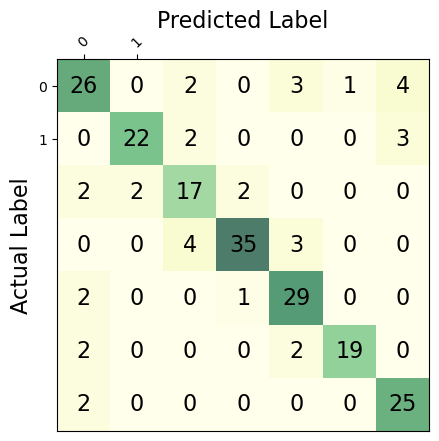

In [15]:
# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)

print(classification_report(y_test,y_test_pred))
#print(confusion_matrix(y_test,y_test_pred))

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()

#### 导入验证集进行验证

In [39]:
test_flux = np.load('fluxval1200.npy')
test_flux1 = test_flux[:,0,:]

test_pred1 = rfc.predict(test_flux1)
test_prob1 = rfc.predict_proba(test_flux1)

with open('wangshuochun.txt', 'w') as file:
    for item in test_pred1[:1000]:  # 确保我们只取前1000个元素
        file.write("%s\n" % item)  # 写入文件，并在每个元素后添加换行符

/mnt/storage-data2/conda_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/mnt/storage-data2/conda_env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
test_pred_series = pd.Series(test_pred)
test_pred_series.value_counts()

B    238
K    204
G    192
F    164
A    162
M    145
O     95
Name: count, dtype: int64